In [86]:
import matplotlib.pyplot as plot
from scipy import signal
from scipy.io import wavfile
import numpy as np
from scipy.fftpack import fft, ifft, rfft, fftfreq, irfft

In [2]:
sample_rate, sample = wavfile.read(r"C:\Users\Dan\Documents\Python Scripts\Sound_Files\A10_Jet_Flyby_fire.wav")

samples = sample.sum(axis=1) / 2

frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
timeArry=np.arange(0, len(sample), 1)
timeArry=timeArry/(sample_rate)
print(sample_rate)
print(len(times))
print(len(sample))
#print(times.shape())
print(len(frequencies))
#print(frequencies[:100])
#print(times[:100])

44100
1230
275655
129


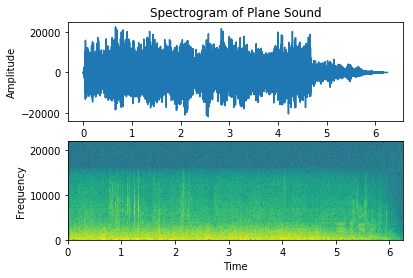

In [3]:
plot.subplot(211)

plot.title('Spectrogram of Plane Sound')

 

plot.plot(timeArry,samples)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(samples,Fs=sample_rate)

plot.xlabel('Time')

plot.ylabel('Frequency')

plot.show()


In [4]:
fftsample = fft(samples)
sample_legnth=len(samples)
numUniquePoints = int( np.ceil((sample_legnth + 1) / 2.0))
fftArray = fftsample[0:numUniquePoints]


In [19]:
#Transforming the array into true frequency space, excluding odd/imaginary elements
#abs value doesn't work as it should fftArray=abs(fftArray)/(len(samples)
fftArray=np.real(fftArray)
fftArray=np.abs(fftArray)
#removing Nyquist point
if sample_legnth % 2 > 0:
    fftArray[1:sample_legnth] = fftArray[1:sample_legnth]*2

else:
    fftArray[1:sample_legnth] = fftArray[1:sample_legnth -1]*2

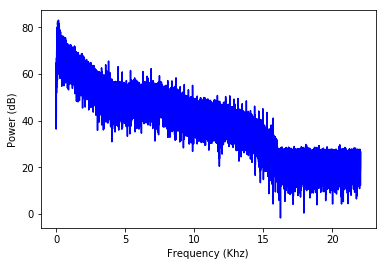

In [20]:
freqArray = np.arange(0, numUniquePoints, 1.0) * (sample_rate / len(samples))
#Plot the frequency
plot.plot(freqArray/1000, 10 * np.log10 (fftArray), color='B')
plot.xlabel('Frequency (Khz)')
plot.ylabel('Power (dB)')
plot.show()


In [83]:
#making cuts to highlight certain components
samplefftfreq = fftfreq(sample_legnth, d=1/sample_rate)
cut_low=75
cut_high=500
cut_freq=rfft(samples)
#high pass filter removing base engine noise, ignore for now
#cut_freq[np.abs(cut_freq)*(sample_rate / len(samples)) < cut_low] = 0
#low pass filter removing noise at end of range
cut_freq[(((samplefftfreq))<cut_high) ] = 0
final_sample=irfft(cut_freq)

C:\Users\Dan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


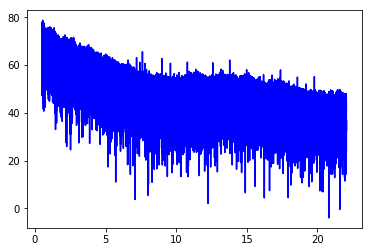

In [84]:
cutfftArray=np.abs(cut_freq)

#removing Nyquist point
if sample_legnth % 2 > 0: #we've got odd number of points in fft
    cutfftArray[1:sample_legnth] = cutfftArray[1:sample_legnth]*2

else: #We've got even number of points in fft
    cutfftArray[1:sample_legnth] = cutfftArray[1:sample_legnth -1]*2
    
cutfreqArray = np.arange(0, len(cutfftArray), 1.0) * (sample_rate / len(samples))
plot.plot(cutfreqArray/1000, 10 * np.log10 (cutfftArray), color='B')


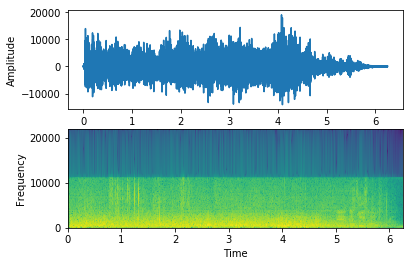

In [99]:
#graphing result
plot.subplot(211)

plot.plot(timeArry,final_sample)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(final_sample,Fs=sample_rate)

plot.xlabel('Time')

plot.ylabel('Frequency')

plot.show()

In [92]:
#Doing MFCCs; start with segmentation
pre_emphasis=0.97 
frame_stride=0.01
frame_size = 0.025
emphasized_signal = np.append(samples[0], samples[1:] - pre_emphasis * samples[:-1])
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step)) 
pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(emphasized_signal, z) 
indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]

In [98]:
#building filter banks
frames *= np.hamming(frame_length)
mag_frames = np.absolute(np.fft.rfft(frames, 512)) 
pow_frames = ((1.0 / 512) * ((mag_frames) ** 2))